# TASK 2 - PREDICTION USING UNSUPERVISED ML

### From the given IRIS dataset, we need to predict the optimum number of clusters and represent it visually

## Presentor: Vigneswari Geethika Angi

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

### Loading the Iris data set

In [2]:
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Finding the optimal number of clusters for K-means and then determing the value of K

In [5]:
x = iris_df.iloc[:, [0,1,2,3]].values

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter= 300, 
                   n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

D:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Plotting the results onto a line graph, post that we can observe 'The Elbow'

Text(0, 0.5, 'WCSS')

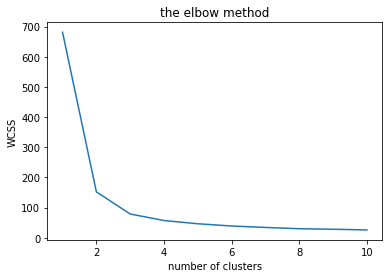

In [8]:
plt.plot(range(1,11), wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
#within cluster sum of sqares
plt.ylabel('WCSS')

### Creating K-Means Cluster

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300
               , n_init=10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the cluster data

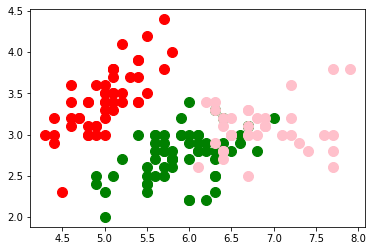

In [11]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'pink', label = 'Iris-virginica') 

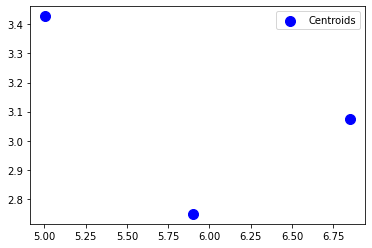

In [12]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()

### combining both the graphs

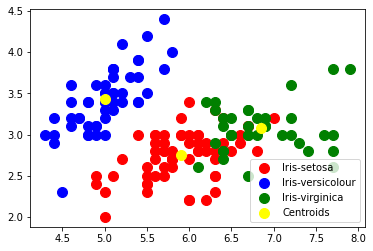

In [13]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()